In [ ]:
#importing Libraries
import cv2
from matplotlib import pyplot as plt
import numpy as np


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
lic_data = cv2.CascadeClassifier('/content/drive/My Drive/TI3D/PCVK/UAS/haarcascade_russian_plate_number.xml')

In [ ]:
def plt_show(image, title="", gray = False, size =(100,100)):
    temp = image
    if gray == False:
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
        plt.title(title)
        plt.imshow(temp, cmap='gray')
        plt.show()

In [ ]:
def detect_number(img):
    temp = img
    gray = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
    number = lic_data.detectMultiScale(img,1.2)
    print("number plate detected:"+str(len(number)))
    for numbers in number:
        (x,y,w,h) = numbers
        cv2.rectangle(temp, (x,y), (x+w,y+h), (0,255,0), 3)
        
    plt_show(temp)

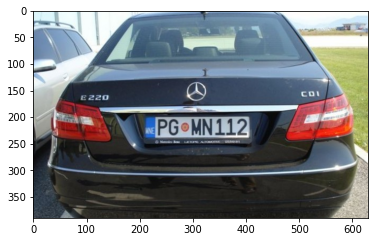

number plate detected:1


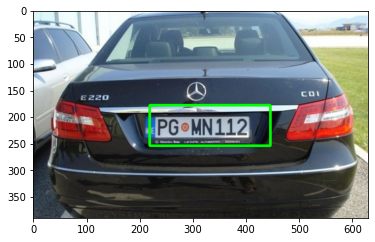

In [ ]:
#Take input of car image with number plate
img = cv2.imread("/content/drive/My Drive/TI3D/PCVK/UAS/images/car_1.jpg")
plt_show(img)
detect_number(img)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f443a7a21d0>,
 <matplotlib.image.AxesImage at 0x7f443a7849d0>)

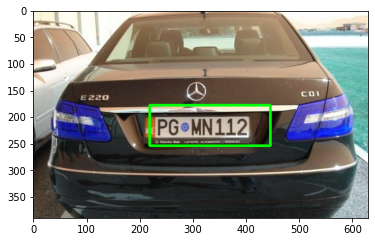

In [ ]:
plt.subplot(1,1,1), plt.imshow(img)

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

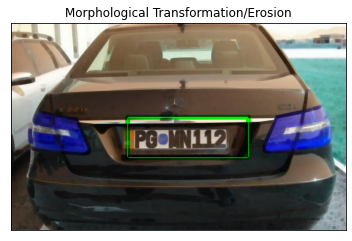

In [ ]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

plt.subplot(1,1,1), plt.imshow(erosion)
plt.title('Morphological Transformation/Erosion'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
! pip install Pillow
! sudo apt install tesseract-ocr
# ! pip install tesseract-ocr
! pip install pytesseract
# ! pip install imutils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
img = cv2.resize(img, (620,480) )
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grey scale

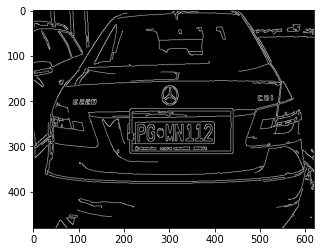

In [ ]:
# gaussian = cv2.GaussianBlur(gray, (5, 5), 0)
# edged = cv2.Canny(gaussian, 75, 200) 

bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
import imutils
# first it finds the contours from a edge detected image, then it sorts the contours
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

In [ ]:
location = None
for contour in contours:
    #calculate perimeter of the contour
    peri = cv2.arcLength(contour, True)

    # function to smooth and approximate the quadrilateral
    # approxPolyDP works for the cases where there are sharp edges in the contours like a document boundary.
    approx = cv2.approxPolyDP(contour, 0.018 * peri, True)
    
    if len(approx) == 4:
        location = approx
        break

In [ ]:
location

array([[[400, 249]],

       [[226, 247]],

       [[220, 294]],

       [[398, 294]]], dtype=int32)

In [ ]:
if location is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    cv2.drawContours(img, [location], -1, (0, 0, 255), 3)

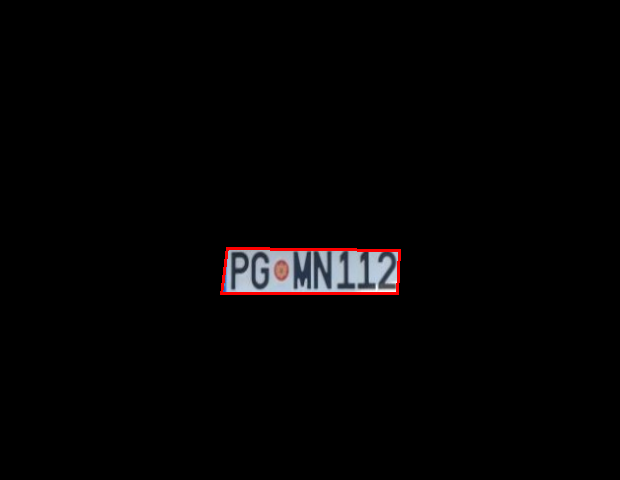

(<matplotlib.axes._subplots.AxesSubplot at 0x7f443a86b690>,
 <matplotlib.image.AxesImage at 0x7f443bcc0dd0>)

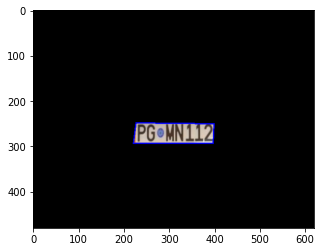

In [ ]:
# Masking the part other than the number plate
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[location],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)
cv2_imshow(new_image)
plt.subplot(1,1,1), plt.imshow(new_image)

In [ ]:
# Now crop
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
print(topx)
print(topy)
print(bottomx)
print(bottomy)
Cropped = gray[topx:bottomx+1, topy:bottomy+1]

247
220
294
400


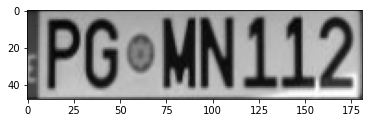

In [ ]:
plt.imshow(Cropped, cmap = 'gray');

In [ ]:
#Read the number plate
import pytesseract
try:
 from PIL import Image
except ImportError:
 import Image
import re

 
text = pytesseract.image_to_string(Cropped, lang='eng', config='--psm 6')
print("Detected license plate Number is:",re.sub('[!@#$:-]|', '', text))

Detected license plate Number is: ‘PGoMN112



In [ ]:
!pip install easyocr
!pip install imutils

In [ ]:
import easyocr
reader = easyocr.Reader(['en'])
result = reader.readtext(Cropped)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[2, 0], [181, 0], [181, 48], [2, 48]], 'PGoMN112', 0.8361440880864459)]